In [1]:
%matplotlib inline
from ppclass import pp
import planets
import numpy as np
import ppplot
myp = planets.Mars

In [2]:
freq = .041667 # one output every freq sols

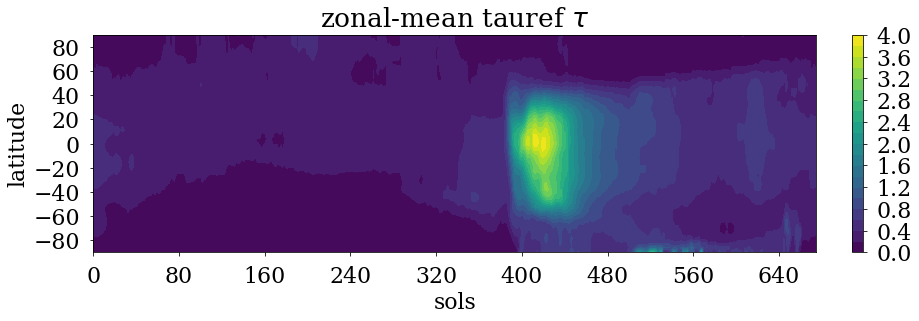

In [3]:
tau = pp(quiet=True)
tau.xp, tau.yp = 16,4
tau.file = "tauref.nc"
tau.var = "tauref"
tau.x = "-180,180"
tau.colorbar = "viridis"
tau.vmin, tau.vmax, tau.fmt = 0.0, 4.0, "%.1f"
tau.useindex = "1000"
tau.xcoeff = freq
tau.xlabel = "sols"
tau.title = r'zonal-mean tauref $\tau$'
m = tau.getplot()

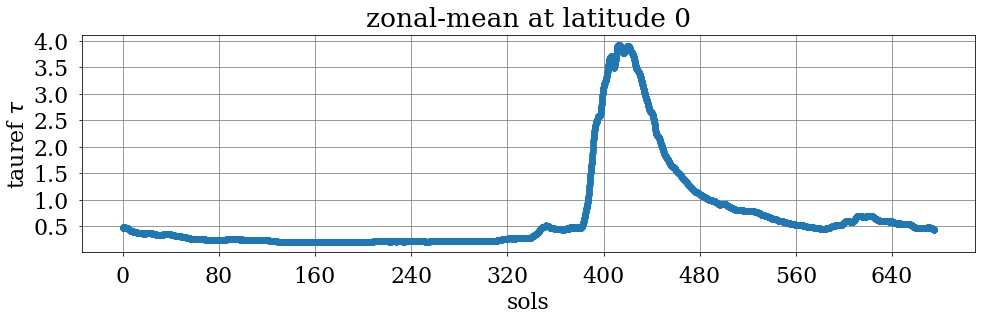

In [4]:
tau.y = 0
tau.marker = "."
tau.title = r'zonal-mean at latitude 0'
tau.ylabel = r'tauref $\tau$'
m = tau.getplot()

/home/aspiga/soft/conda/miniconda2/envs/py2/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


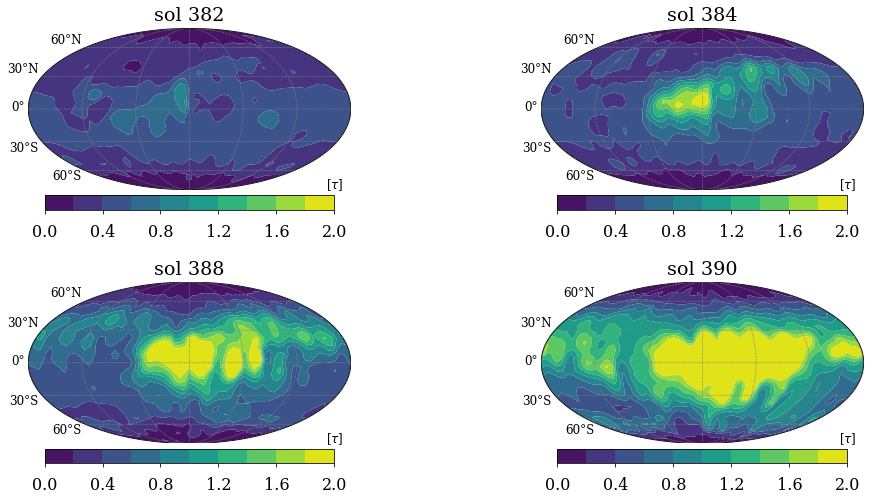

pp object. "help(pp)" for more information

In [5]:
tau = pp(quiet=True)
tau.xp, tau.yp = 16,8
tau.file = "tauref.nc"
tau.var = "tauref"
tau.t = [382./freq,385./freq,388./freq,391./freq]
tau.colorbar = "viridis"
tau.vmin, tau.vmax, tau.fmt, tau.div = 0.0, 2.0, "%.1f", 10
tau.useindex = "1000"
tau.units = r'$\tau$'
tau.proj = "moll"
m = tau.getdefineplot()
for iii in range(4):
  tau.p[iii].title = "sol "+str(int(float(tau.t[iii])*freq))
tau.makeplot()

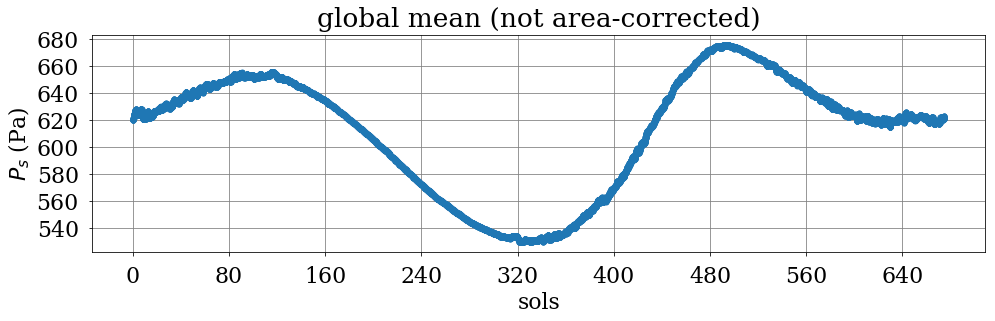

In [6]:
ps = pp(quiet=True)
ps.xp, ps.yp = 16,4
ps.file = "ps.nc"
ps.var = "ps"
ps.fmt = '%.0f'
ps.x = "-180,180"
ps.y = "-90,90"
ps.useindex = "1000"
ps.xcoeff = freq
ps.xlabel = "sols"
ps.marker = "."
ps.ylabel = r'$P_s$ (Pa)'
ps.title = "global mean (not area-corrected)"
m = ps.getplot()

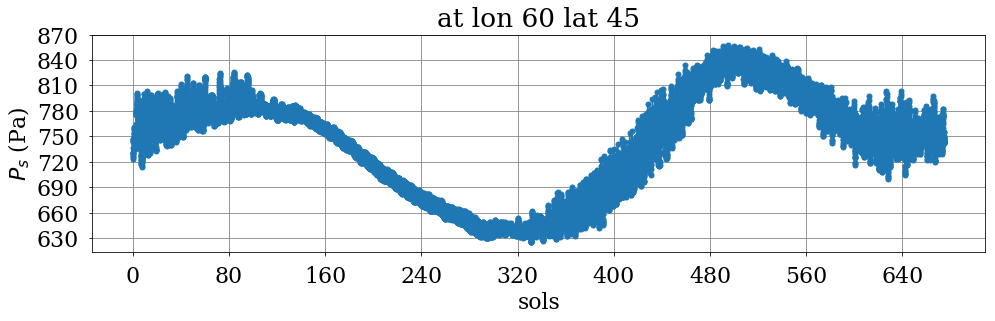

In [7]:
ps.x = 60.
ps.y = 45.
ps.title = "at lon %.0f lat %.0f" % (ps.x,ps.y)
m = ps.getplot()

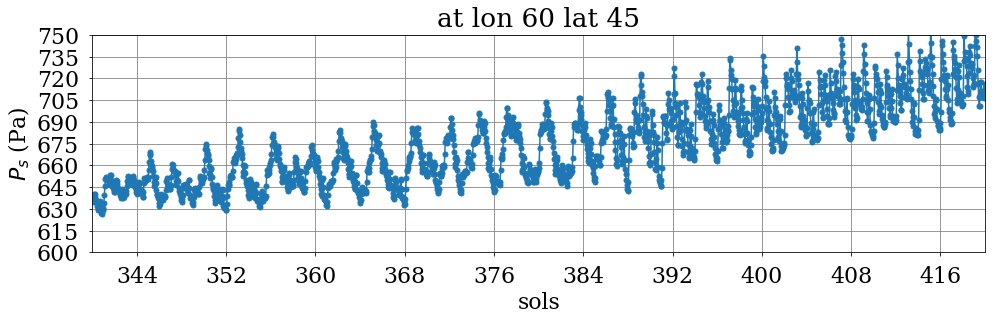

In [8]:
ps.xmin = 340.
ps.xmax = 420.
ps.ymin = 600.
ps.ymax = 750.
m = ps.getplot()

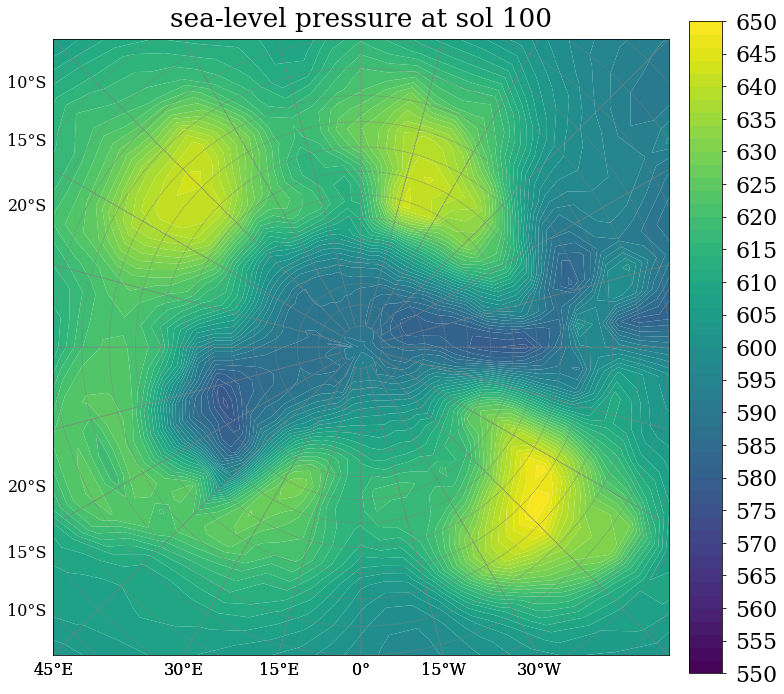

In [9]:
zet = int(100/freq)
ps,xx,yy,zz,tt = pp(file="ps.nc"      ,var="ps"  ,t=zet, useindex="1000").getfd()
t7             = pp(file="temp7.nc"   ,var="temp",t=zet, useindex="1000").getf()
hgt            = pp(file="phisinit.nc",var="phisinit").getf() / myp.g
####
rat = hgt/myp.H(T0=t7)
ps_sealevel = (np.exp(rat))*ps
####
zefig = ppplot.figuref(x=12,y=12)
pl = ppplot.plot2d(fig=zefig)
pl.f = ps_sealevel
pl.x = xx
pl.y = yy
pl.proj = "spstere"
pl.colorbar = "viridis"
pl.vmin, pl.vmax, pl.fmt = 550,650, "%.0f"
pl.div = 50
pl.blat = -25
pl.title = "sea-level pressure at sol %0.f" % (zet*freq)
pl.makeshow()